<a href="https://colab.research.google.com/github/hvr2026/Clustering-Algorithms/blob/main/Audio%20Embeddings%20Feature%20Extraction%20and%20Clustering/Audio_Embeddings_Feature_Extraction_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install git+https://github.com/facebookresearch/ImageBind.git librosa scikit-learn matplotlib seaborn umap-learn plotly pandas


  Cloning https://github.com/facebookresearch/ImageBind.git to /tmp/pip-req-build-0fp_py71
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/ImageBind.git /tmp/pip-req-build-0fp_py71
  Resolved https://github.com/facebookresearch/ImageBind.git to commit 3fcf5c9039de97f6ff5528ee4a9dce903c5979b3
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision 28fe037d212663c6a24f373b94cc5d478c8c1a1d) to /tmp/pip-install-x9v476g4/pytorchvideo_91bea6052abd4ebb898e6d2d4ed7afed
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-install-x9v476g4/pytorchvideo_91bea6052abd4ebb898e6d2d4ed7afed
  Running command git rev-parse -q --verify 'sha^28fe037d212663c6a24f373b94cc5d478c8c1a1d'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Running command git checkout -q 

In [3]:
!pip install umap-learn


  Using cached umap_learn-0.5.7-py3-none-any.whl.metadata (21 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
Using cached umap_learn-0.5.7-py3-none-any.whl (88 kB)
Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)


In [5]:
!pip install git+https://github.com/facebookresearch/ImageBind.git


  Cloning https://github.com/facebookresearch/ImageBind.git to /tmp/pip-req-build-1hwcwiy8
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/ImageBind.git /tmp/pip-req-build-1hwcwiy8
  Resolved https://github.com/facebookresearch/ImageBind.git to commit 3fcf5c9039de97f6ff5528ee4a9dce903c5979b3
  Preparing metadata (setup.py) ... done
  Using cached pytorchvideo-0.1.5-py3-none-any.whl
  Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached timm-0.6.7-py3-none-any.whl.metadata (33 kB)
  Using cached ftfy-6.3.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached fvcore-0.1.5.post20221221-py3-none-any.whl
  Using cached eva_decord-0.6.1-py3-none-manylinux2010_x86_64.whl.metadata (449 bytes)
  Using cached iopath-0.1.10-py3-none-any.whl
  Using cached types_regex-2024.11.6.20241108-py3-none-any.whl.metadata (1.8 kB)
  Using cached mayavi-4.8.2.tar.gz (7.1 MB)
  Installing build dependencies ... done
  Getting requi

In [11]:
!pip install pydub


In [12]:
!apt-get install -y ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [23]:
#Checking
!pip install librosa scikit-learn matplotlib seaborn umap-learn plotly pandas

In [24]:
# Step 1: Import necessary libraries
print("Step 1: Importing libraries...")
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import umap
from scipy.cluster.hierarchy import dendrogram, linkage

# Verify successful imports
print("All libraries imported successfully.")

Step 1: Importing libraries...
All libraries imported successfully.


In [29]:
# Step 2: Generate synthetic audio data
print("\nStep 2: Generating synthetic audio data...")
mel_features = []
audio_paths = []

# Generate 5 synthetic audio signals
num_samples = 5
sr = 16000  # Sampling rate
duration = 3  # seconds
t = np.linspace(0, duration, int(sr * duration), endpoint=False)

for i in range(num_samples):
    # Generate a sine wave with a different frequency for each sample
    freq = 220 + i * 110  # Start at 220 Hz, increment by 110 Hz
    y = 0.5 * np.sin(2 * np.pi * freq * t)

    # Process the synthetic signal
    print(f"Processing synthetic signal {i+1} with frequency {freq} Hz.")

    # Extract Mel-spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40, fmax=8000)
    mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    print(f"Extracted Mel-spectrogram shape: {mel_db.shape}")

    # Aggregate features (mean across time frames)
    mel_mean = np.mean(mel_db, axis=1)
    mel_features.append(mel_mean)
    audio_paths.append(f"Synthetic_{i+1}")

# Convert to NumPy array for clustering
mel_features = np.array(mel_features)
if len(mel_features) == 0:
    print("Error: No valid Mel-spectrogram features were extracted.")
    raise ValueError("Empty Mel-spectrogram features array.")
else:
    print(f"Final Mel-spectrogram features shape: {mel_features.shape}")




Step 2: Generating synthetic audio data...
Processing synthetic signal 1 with frequency 220 Hz.
Extracted Mel-spectrogram shape: (40, 94)
Processing synthetic signal 2 with frequency 330 Hz.
Extracted Mel-spectrogram shape: (40, 94)
Processing synthetic signal 3 with frequency 440 Hz.
Extracted Mel-spectrogram shape: (40, 94)
Processing synthetic signal 4 with frequency 550 Hz.
Extracted Mel-spectrogram shape: (40, 94)
Processing synthetic signal 5 with frequency 660 Hz.
Extracted Mel-spectrogram shape: (40, 94)
Final Mel-spectrogram features shape: (5, 40)



Step 3: Performing dimensionality reduction using UMAP...
UMAP reduced features to shape: (5, 2)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


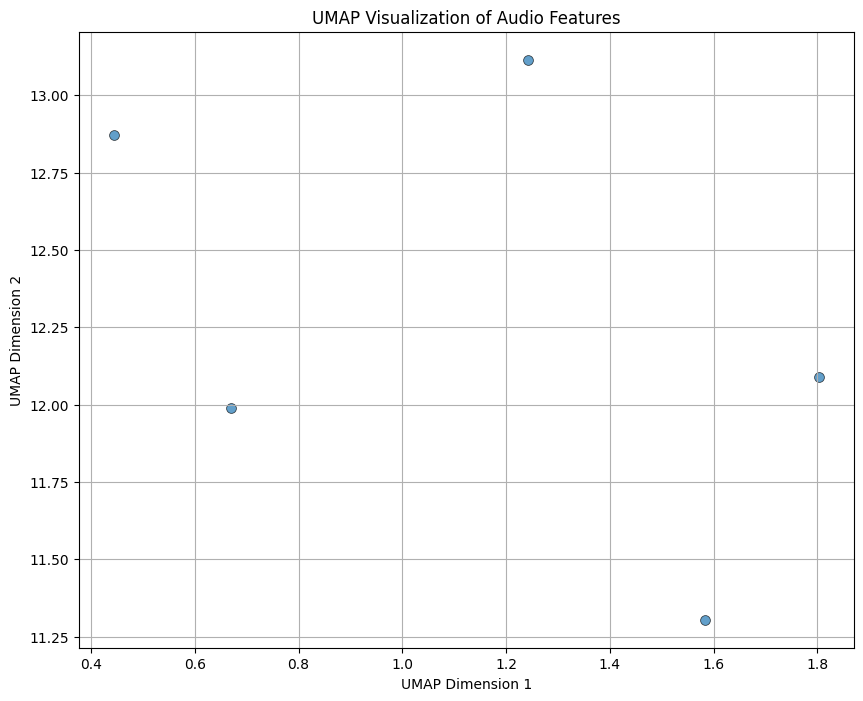

In [30]:
# Step 3: Perform dimensionality reduction using UMAP
print("\nStep 3: Performing dimensionality reduction using UMAP...")
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embeddings_umap = reducer.fit_transform(mel_features)
print(f"UMAP reduced features to shape: {embeddings_umap.shape}")

# Plot UMAP results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings_umap[:, 0], y=embeddings_umap[:, 1], s=50, alpha=0.7, edgecolor='k')
plt.title("UMAP Visualization of Audio Features")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid()
plt.show()


In [31]:

# Step 4: Perform KMeans clustering
print("\nStep 4: Clustering using KMeans...")
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_umap)
print(f"KMeans assigned clusters: {clusters}")



Step 4: Clustering using KMeans...
KMeans assigned clusters: [2 0 1 1 1]



Step 5: Analyzing cluster sizes...
Cluster sizes:
   Cluster  Size
0        1     3
1        0     1
2        2     1


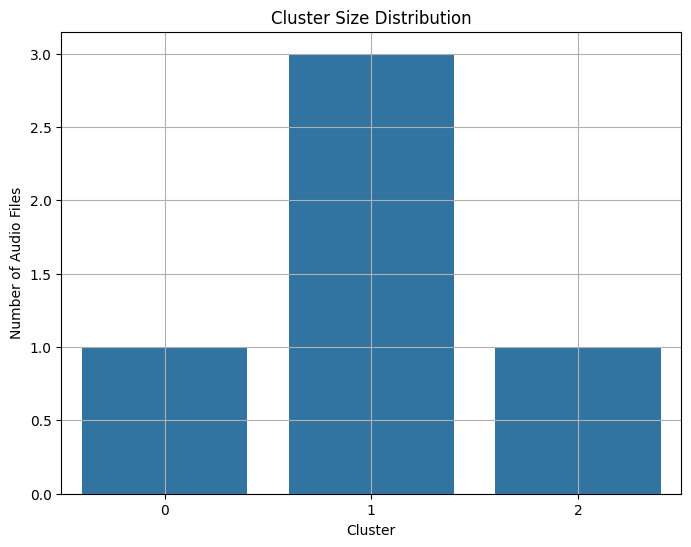

In [32]:
# Step 5: Analyze cluster sizes
print("\nStep 5: Analyzing cluster sizes...")
cluster_sizes = pd.DataFrame({"Cluster": clusters}).value_counts().reset_index()
cluster_sizes.columns = ["Cluster", "Size"]
print(f"Cluster sizes:\n{cluster_sizes}")

# Plot cluster size distribution
plt.figure(figsize=(8, 6))
sns.barplot(x="Cluster", y="Size", data=cluster_sizes)
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Audio Files")
plt.grid()
plt.show()





Step 6: Visualizing cluster centroids...


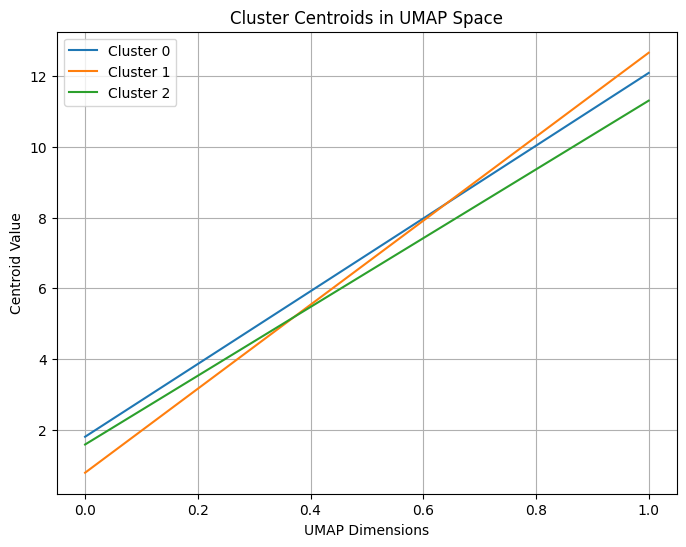

In [33]:
# Step 6: Visualize cluster centroids
print("\nStep 6: Visualizing cluster centroids...")
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    centroid = kmeans.cluster_centers_[i]
    plt.plot(centroid, label=f"Cluster {i}")
plt.title("Cluster Centroids in UMAP Space")
plt.xlabel("UMAP Dimensions")
plt.ylabel("Centroid Value")
plt.legend()
plt.grid()
plt.show()



Step 7: Hierarchical clustering dendrogram...


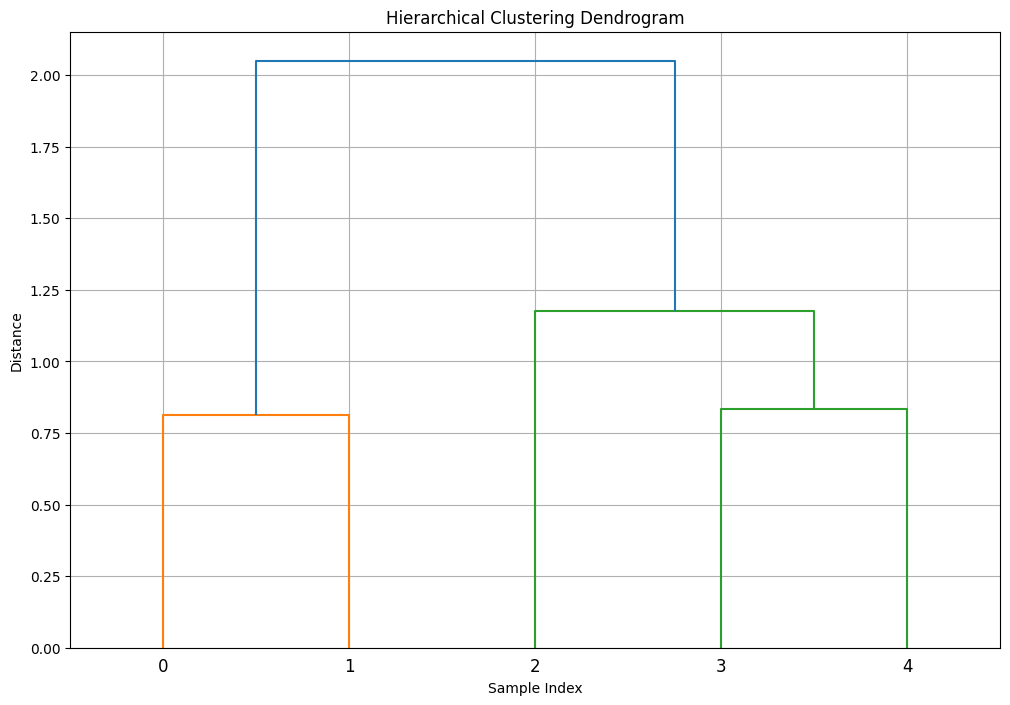

In [34]:
# Step 7: Dendrogram for hierarchical clustering
print("\nStep 7: Hierarchical clustering dendrogram...")
Z = linkage(embeddings_umap, method="ward")
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode="level", p=3)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid()
plt.show()



In [35]:
# Step 8: Compute Silhouette Score
print("\nStep 8: Computing Silhouette Score...")
silhouette_avg = silhouette_score(embeddings_umap, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Step 8: Computing Silhouette Score...
Silhouette Score: 0.12



Step 9: Performing dimensionality reduction using t-SNE...
Using perplexity=4 for t-SNE.
t-SNE reduced features to shape: (5, 2)


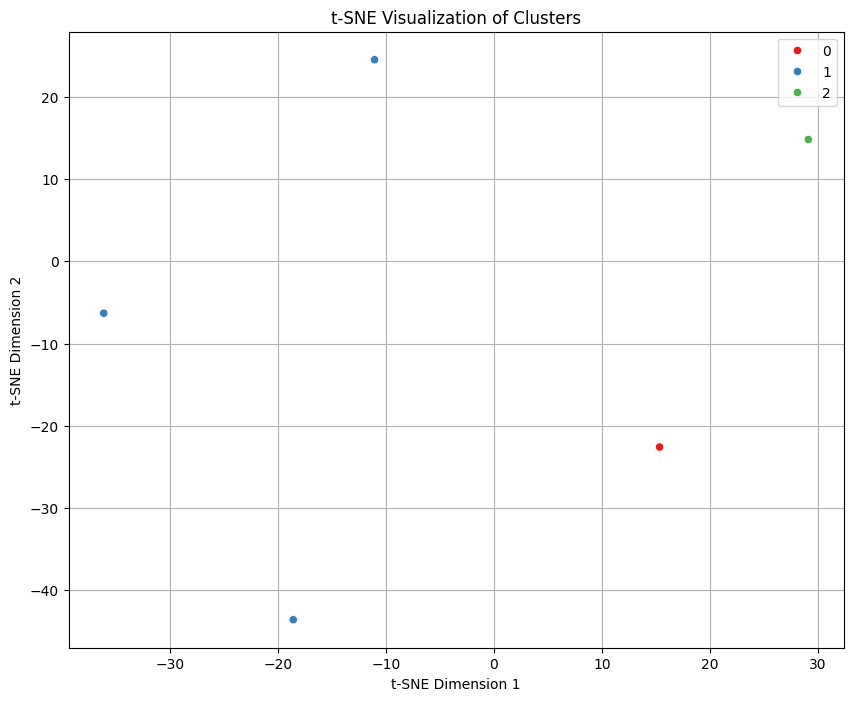

In [36]:
# Step 9: Perform dimensionality reduction using t-SNE
print("\nStep 9: Performing dimensionality reduction using t-SNE...")

from sklearn.manifold import TSNE

# Adjust perplexity dynamically to avoid errors
perplexity = max(2, mel_features.shape[0] - 1)
print(f"Using perplexity={perplexity} for t-SNE.")

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
embeddings_tsne = tsne.fit_transform(mel_features)
print(f"t-SNE reduced features to shape: {embeddings_tsne.shape}")

# Plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=embeddings_tsne[:, 0],
    y=embeddings_tsne[:, 1],
    hue=clusters,
    palette="Set1",
    legend="full"
)
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid()
plt.show()



Step 10: Visualizing and summarizing clustering results...


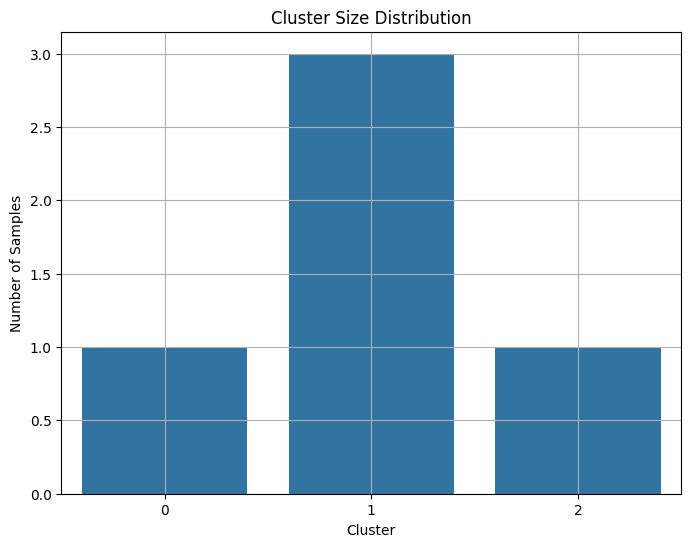

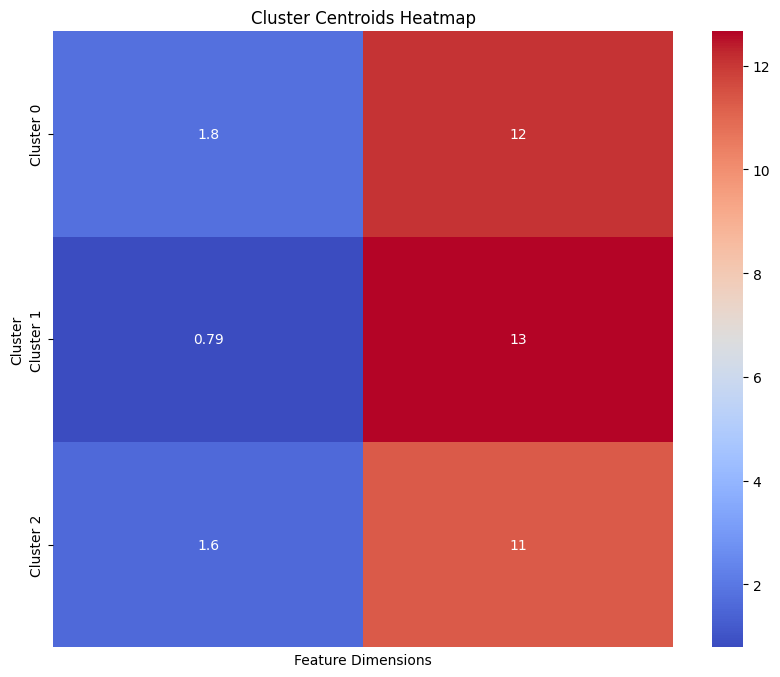

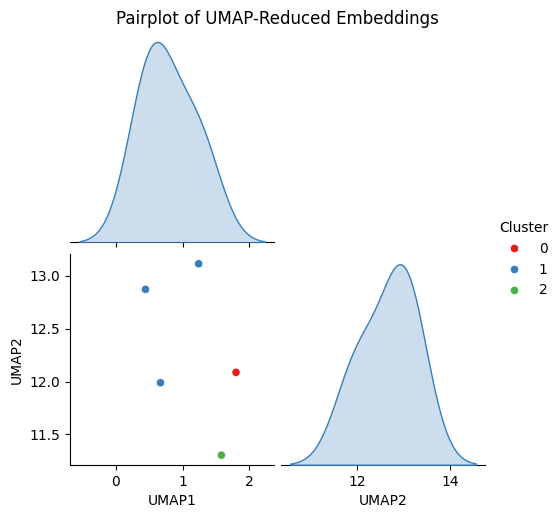

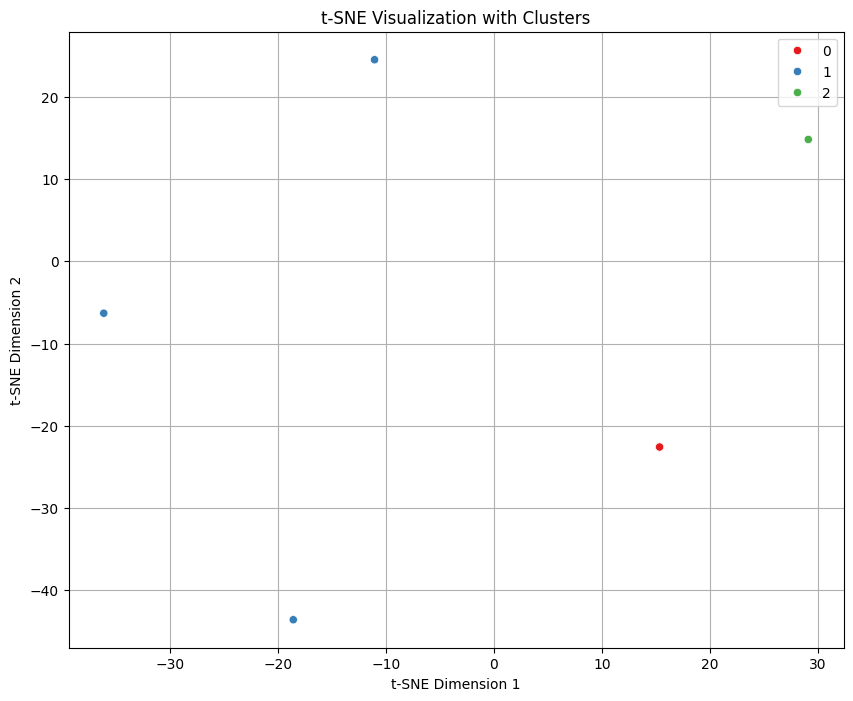

Cluster 0 contains: ['Synthetic_2']
Cluster 1 contains: ['Synthetic_3', 'Synthetic_4', 'Synthetic_5']
Cluster 2 contains: ['Synthetic_1']


In [37]:
# Step 10: Enhanced visualization of clustering results
print("\nStep 10: Visualizing and summarizing clustering results...")

# 1. Bar plot of cluster sizes
plt.figure(figsize=(8, 6))
sns.barplot(x="Cluster", y="Size", data=cluster_sizes)
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Samples")
plt.grid()
plt.show()

# 2. Cluster centroids heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    kmeans.cluster_centers_,
    cmap="coolwarm",
    annot=True,
    cbar=True,
    xticklabels=False,
    yticklabels=[f"Cluster {i}" for i in range(n_clusters)]
)
plt.title("Cluster Centroids Heatmap")
plt.xlabel("Feature Dimensions")
plt.ylabel("Cluster")
plt.show()

# 3. Pairplot of UMAP-reduced embeddings
reduced_df = pd.DataFrame(embeddings_umap, columns=["UMAP1", "UMAP2"])
reduced_df["Cluster"] = clusters
sns.pairplot(reduced_df, hue="Cluster", diag_kind="kde", palette="Set1", corner=True)
plt.suptitle("Pairplot of UMAP-Reduced Embeddings", y=1.02)
plt.show()

# 4. Cluster overlay on t-SNE visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=embeddings_tsne[:, 0],
    y=embeddings_tsne[:, 1],
    hue=clusters,
    palette="Set1",
    legend="full"
)
plt.title("t-SNE Visualization with Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid()
plt.show()

# Step 10: Summary of clustering results
for i in range(n_clusters):
    cluster_items = [audio_paths[j] for j in range(len(clusters)) if clusters[j] == i]
    print(f"Cluster {i} contains: {cluster_items}")


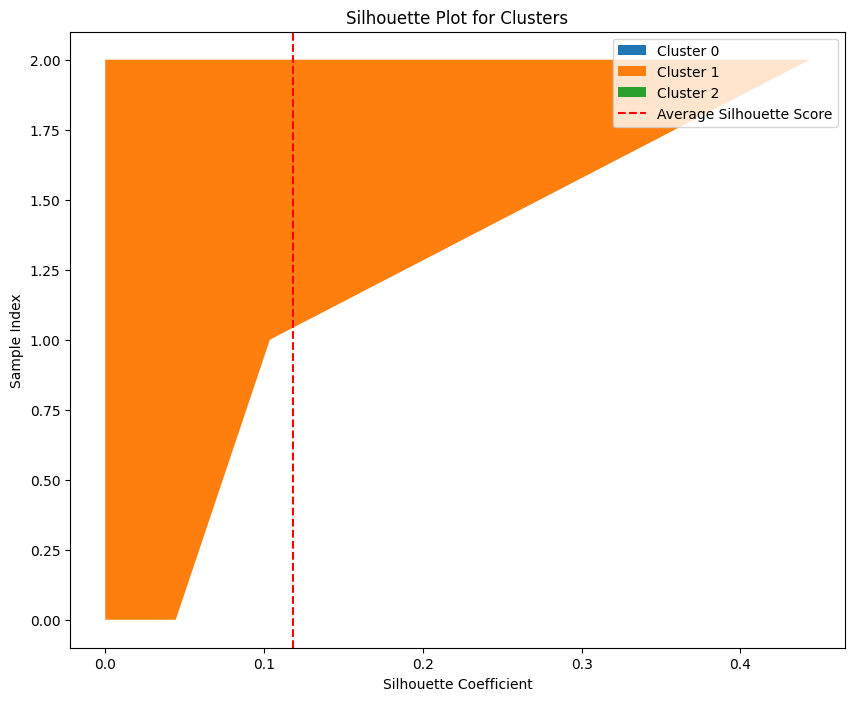

In [38]:
#Step 11: Silhouette Analysis
from sklearn.metrics import silhouette_samples

# Compute silhouette scores for each sample
silhouette_values = silhouette_samples(embeddings_umap, clusters)

# Plot silhouette scores by cluster
plt.figure(figsize=(10, 8))
for i in range(n_clusters):
    ith_silhouette_values = silhouette_values[clusters == i]
    ith_silhouette_values.sort()
    plt.fill_betweenx(
        np.arange(len(ith_silhouette_values)),
        0,
        ith_silhouette_values,
        label=f"Cluster {i}"
    )
plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Sample Index")
plt.axvline(silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
plt.legend()
plt.show()


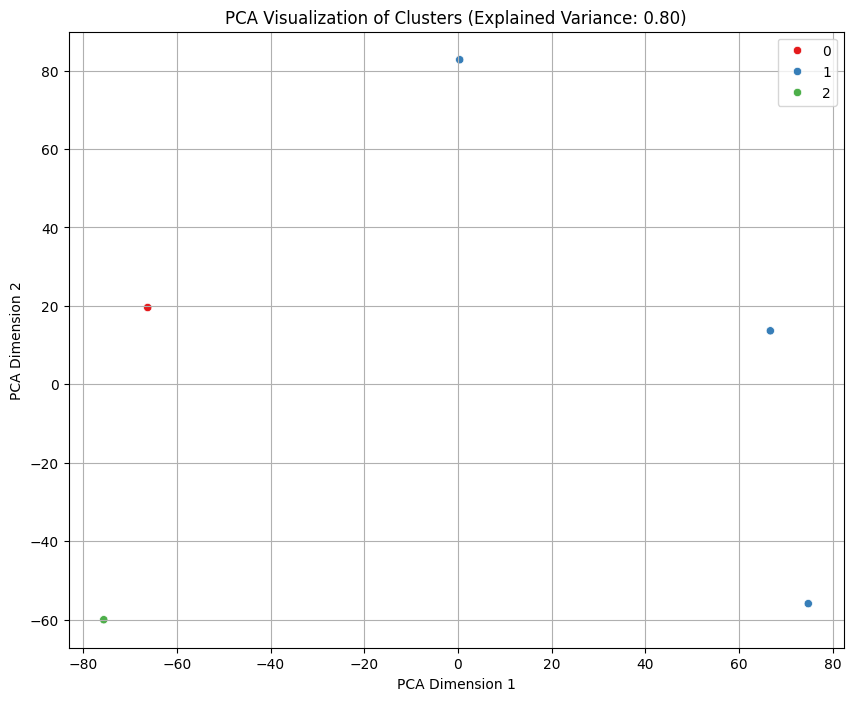

In [39]:
#Step 12: Cluster Projections in PCA Space
from sklearn.decomposition import PCA

# Reduce dimensions using PCA for cluster projection
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(mel_features)
explained_variance = pca.explained_variance_ratio_

# Plot clusters in PCA-reduced space
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=pca_embeddings[:, 0],
    y=pca_embeddings[:, 1],
    hue=clusters,
    palette="Set1",
    legend="full"
)
plt.title(f"PCA Visualization of Clusters (Explained Variance: {explained_variance.sum():.2f})")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.grid()
plt.show()


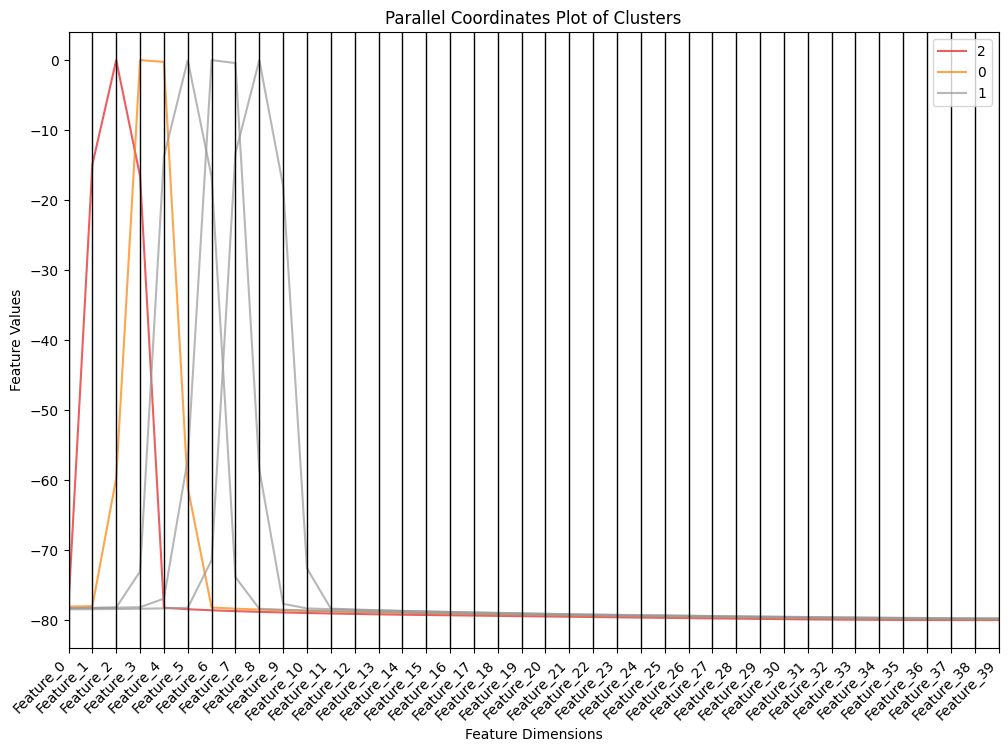

In [41]:
#Step 13: Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates

# Create DataFrame for parallel coordinates
cluster_df = pd.DataFrame(mel_features, columns=[f"Feature_{i}" for i in range(mel_features.shape[1])])
cluster_df["Cluster"] = clusters

# Plot parallel coordinates
plt.figure(figsize=(12, 8))
parallel_coordinates(cluster_df, class_column="Cluster", colormap="Set1", alpha=0.7)
plt.title("Parallel Coordinates Plot of Clusters")
plt.xlabel("Feature Dimensions")
plt.ylabel("Feature Values")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.grid()
plt.show()

